* Variante del ejemplo 10.3, del Libro Priciples of Data Science

    https://openstax.org/books/principles-data-science/pages/10-2-validating-your-model

# **Problema**

Un equipo de ciencia de datos está analizando el conjunto de datos de diabetes (diabetes.csv) mediante un Decision Tree Classifier para comprender mejor cómo factores como Hipertensión, Enfermedad cardíaca, Antecedentes de tabaquismo, HbA1c (Hemoglobina A1c), BMI, Nivel de glucosa en sangre, edad, genero.

In [8]:
  #Carga de librerias para decision trees y vizualisación

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Carga de datos.
df = pd.read_csv('diabetes_prediction_dataset.csv.zip')


Al preparar datos para ejecutar un modelo de decision de árbol de clasificación, se examinan sus características para asegurar que estén correctamente formateados y que contengan los tipos de datos adecuados para el modelo utilizado en este Colab. La función `df.info()` proporciona la lista de características del conjunto de datos obtenido de [diabetes-prediction-dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)  de `Kaggle`.

In [9]:
#examinación del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Se puede ver que la base de datos consiste de 9 variables donde podemos encontra que algunas de ellas son categoricas (definidas como `object`) y otras son númericas (definidas como `int 64` y `float 64`)

Vizualisación de que en el conjunto de datos utilizados para la practica no hay datos nulos, por lo que no es necesario excluir datos de momento.

In [10]:
print('Valores nulos por columna:')
print(df.isnull().sum())

Valores nulos por columna:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Convertimos datos categoricos a datos numericos o dummies según sea necesarios, para facilitar el uso del modelo y mayor efectividad.

In [11]:
#convertir los datos categoricos a datos númericos
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'Other': -1})
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)
# Excluir la columna original antecedentes de tabaquismo 'smoking_history'

C:\Users\danie\AppData\Local\Temp\ipykernel_24484\3510641903.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'Other': -1})


Se puede observar que fue neccesario convertir la variable `gender` de categorica a numerica y ademas se convitieron los datos de `smoking_history`en dummies.

Gráfica para vizualisación de la frecuencia de casos de Diabetes con datos de 10,000 pacientes.

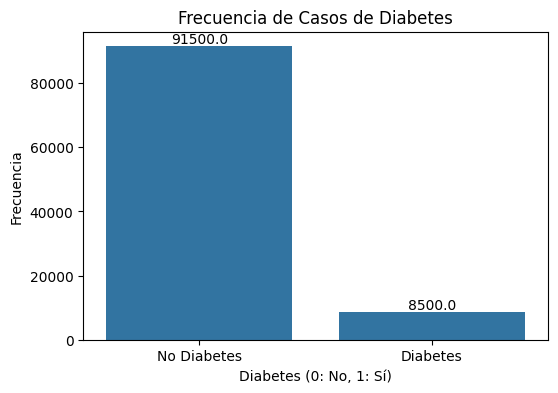

In [12]:
import seaborn as sns

# Create a countplot to visualize the frequency of diabetes cases
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diabetes', data=df)
plt.title('Frecuencia de Casos de Diabetes')
plt.xlabel('Diabetes (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

# Agrega los valores a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Se puede ver que la cantidad de personas con diabetes son `8500` y las que no son `91500`. Por lo que se balancearan los datos para no tener una gran diferencia entre las cantidades de pacientes.

In [13]:
# Separar el DataFrame original en casos de diabetes y no diabetes
df_diabetes = df[df['diabetes'] == 1]
df_no_diabetes = df[df['diabetes'] == 0]

print(f"Número original de casos de diabetes: {len(df_diabetes)}")
print(f"Número original de casos sin diabetes: {len(df_no_diabetes)}")

# Obtener el número de casos de diabetes para undersampling
num_diabetes_cases = len(df_diabetes)

# Realizar undersampling aleatorio en la clase 'No Diabetes'
df_no_diabetes_undersampled = df_no_diabetes.sample(n=num_diabetes_cases, random_state=42)

# Concatenar los casos de diabetes y los casos de no diabetes submuestreados
df_balanced = pd.concat([df_diabetes, df_no_diabetes_undersampled], axis=0)

# Mezclar el DataFrame balanceado para asegurar la aleatoriedad
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Número de casos de diabetes en el conjunto de datos balanceado: {len(df_balanced[df_balanced['diabetes'] == 1])}")
print(f"Número de casos sin diabetes en el conjunto de datos balanceado: {len(df_balanced[df_balanced['diabetes'] == 0])}")


Número original de casos de diabetes: 8500
Número original de casos sin diabetes: 91500
Número de casos de diabetes en el conjunto de datos balanceado: 8500
Número de casos sin diabetes en el conjunto de datos balanceado: 8500


En la siguiente grafica se muestra la cantidad de personas con y sin diabetes balanceada que se realizo en el codigo anterior, para una mejor evalucaión del modelo.

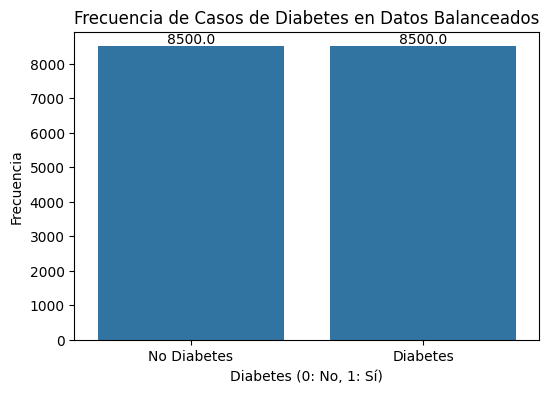

In [14]:
import seaborn as sns

# Create a countplot to visualize the frequency of diabetes cases
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diabetes', data=df_balanced)
plt.title('Frecuencia de Casos de Diabetes en Datos Balanceados')
plt.xlabel('Diabetes (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])

# Agrega los valores a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Para preparar los datos para el modelado, se definen características y objetivos. Además, se establece un conjunto de datos de entrenamiento y otro de prueba para la evaluación del modelo.

In [15]:
#Configurar las características y objetivos de los datos balanceados, y configurar los conjuntos de datos de entrenamiento y prueba.
features_balanced = df_balanced.drop(['diabetes'], axis=1)
targets_balanced = df_balanced['diabetes']

x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(features_balanced, targets_balanced, stratify=targets_balanced, random_state=0)

print("Shape of x_train_balanced:", x_train_balanced.shape)
print("Shape of x_test_balanced:", x_test_balanced.shape)
print("Shape of y_train_balanced:", y_train_balanced.shape)
print("Shape of y_test_balanced:", y_test_balanced.shape)

Shape of x_train_balanced: (12750, 12)
Shape of x_test_balanced: (4250, 12)
Shape of y_train_balanced: (12750,)
Shape of y_test_balanced: (4250,)


Donde se puede vizualisar que la variable objetivo es `diabetes`.

La técnica de modelado utilizada es un decision tree como se menciono anteriormente, que funciona de forma similar a la logistic regression en sklearn al crear la clase y luego usar el método `fit`. El método `fit` para un modelo `DecisionTreeClassifier` en la librería scikit-learn de Python se utiliza para entrenar el modelo utilizando los datos de entrenamiento y prueba.

In [16]:
#ejecutar decision tree
dt = DecisionTreeClassifier()
dt.fit(x_train_balanced, y_train_balanced)

print("Precisión en el conjunto de entrenamiento:", dt.score(x_train_balanced, y_train_balanced))
print("Precisión en el conjunto de prueba:", dt.score(x_test_balanced, y_test_balanced))



Precisión en el conjunto de entrenamiento: 0.9992941176470588
Precisión en el conjunto de prueba: 0.8724705882352941


La precisión observada en el conjunto de entrenamiento es excelente, cercano al `100%`, mientras que en el conjunto de prueba es menor, situándose en el `87.8%`.

Muestra la profundiad del árbol ajustada automaticamente por los datos y el árbol de decisión de clasificación, para decidir si es necesario ajustar la profundidad para una mejor precision y una menor diferencia entre los datos de prueba y entrenamiento.

In [17]:
#Mide la profundidad del tree
dt.get_depth()


30

Se puede ver que la profundidad automatica del árbol de decisión de clasificación es de `30`

Se realizara un ajuste de la profundidad del árbol de decisión de clasificación para mayor precisión y menor diferencia entre los datos de prueba y entrenamiento.

In [18]:
#ajusta la profundidad del decision tree
dt = DecisionTreeClassifier(max_depth=4 )
dt.fit(x_train_balanced, y_train_balanced)

print("Precisión en el conjunto de entrenamiento:", dt.score(x_train_balanced, y_train_balanced))
print("Precisión en el conjunto de prueba:", dt.score(x_test_balanced, y_test_balanced))

Precisión en el conjunto de entrenamiento: 0.8432156862745098
Precisión en el conjunto de prueba: 0.855764705882353


Obtenemos que la precision del modelo es del `85%`, por lo que el modelo es muy efectivo en base a los datos utilizados para la evaluación de este.

Vizualisación del árbol de decisión de clasificación con una profundidad ajustada para mayor comprensión y precisión.

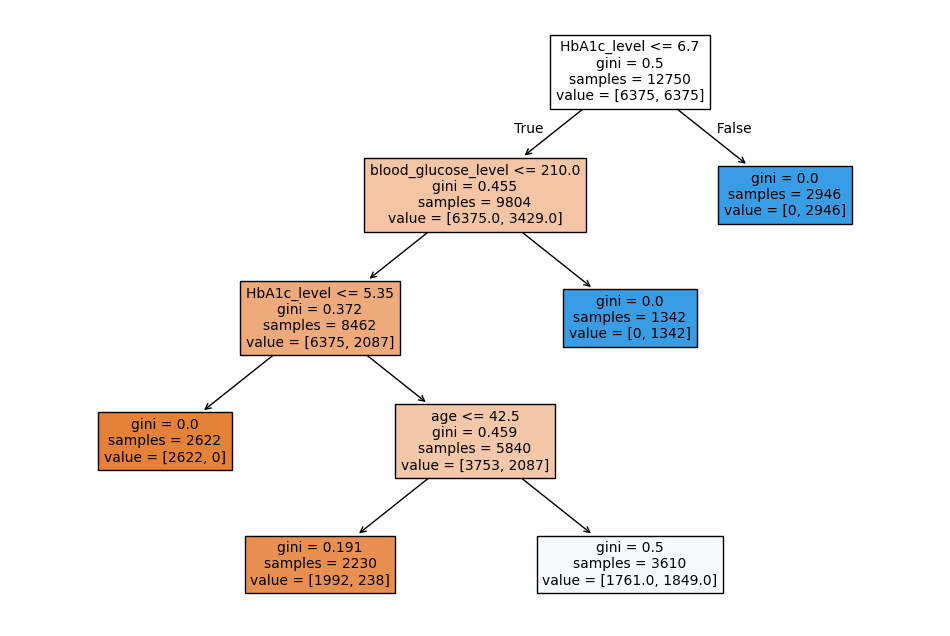

In [19]:
#crea un decision tree con una profundidad maxima determinada
f = plt.figure(figsize=(12, 8))
_ = plot_tree(dt, fontsize=10, feature_names=features_balanced.columns.tolist(), filled=True)

Se puede ver que las variables mas influyentes en el modelo con una profundidad de `4` para la detección de diabetes son `HbA1c` (Hemoglobina A1c), `blood_glucouse_level` (Nivel de glucosa en la sangre), `age` (Edad) y `bmi` (Indice de masa corporal).

El coeficiente de `Gini` se aplica a la salud para medir la desigualdad en áreas como la prevalencia de enfermedades, la carga de la enfermedad, o incluso la mortalidad. Un alto índice de Gini en salud indica una gran desigualdad, donde los recursos o los resultados de salud no se distribuyen de manera equitativa entre la población, lo que puede vincularse a peores resultados de salud.

Gráfica de vizualisación de datos para la comparación entre cada una de las caracteristicas de los diabeticos y no diabeticos para un entendimiento más profundo de aquellos que influyen más en el árbol de decisión de clasificación, donde se excluyeron los datos de antecedentes de tabaquismo puesto que no influye lo necesario para la detección temprana de la diabetes en los pacientes.

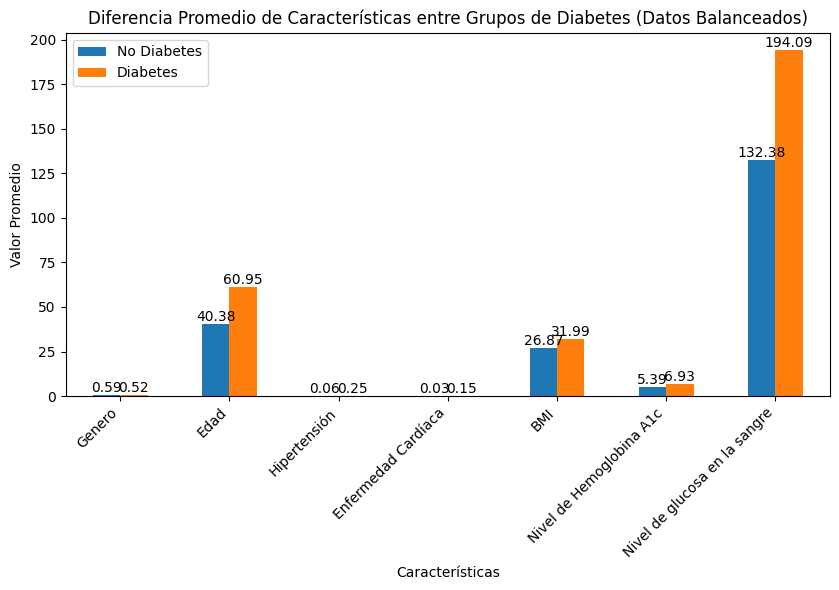

In [20]:
#Calcule el promedio de cada característica para cada grupo de diabetes, excluyendo el historial de tabaquismo.
features_without_smoking = [col for col in features_balanced.columns if 'smoking_history' not in col]
average_data = df_balanced.groupby('diabetes')[features_without_smoking].mean()

# Transponga el DataFrame average_data para facilitar la representación gráfica.
average_data_T = average_data.T

# Define las etiquetas para el eje x.
x_labels = ['Genero', 'Edad', 'Hipertensión', 'Enfermedad Cardíaca', 'BMI', 'Nivel de Hemoglobina A1c', 'Nivel de glucosa en la sangre']

# Crea un gráfico de barras para visualizar las diferencias promedio.
ax = average_data_T.plot(kind='bar', figsize=(8.5, 6))
plt.title('Diferencia Promedio de Características entre Grupos de Diabetes (Datos Balanceados)')
plt.xlabel('Características')
plt.ylabel('Valor Promedio')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right')
plt.legend(['No Diabetes', 'Diabetes'])

# Añade valores encima de las barras
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()

Se puede ver que las variables mas influyentes en el modelo para la detección de diabetes son `HbA1c` (Hemoglobina A1c), `blood_glucouse_level` (Nivel de glucosa en la sangre), `age` (Edad) y `bmi` (Indice de masa corporal).

Gráfica donde se puede vizualisar el porque se excluyen los datos de antecedentes de tabaquismo, si en algun momento fumo o no en su vida una persona no es factor importante en este caso para implicar si tiene o no diabetes.

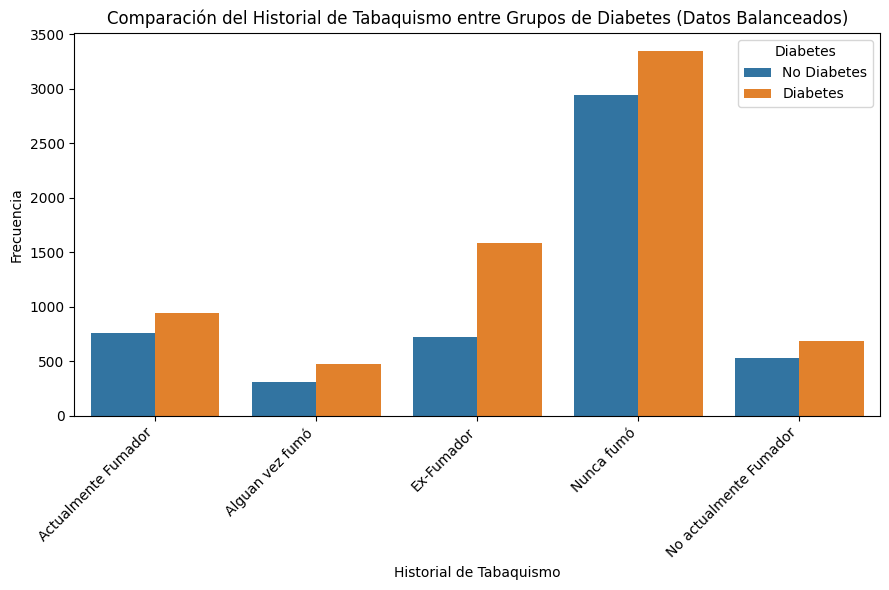

In [21]:
# Transforma el dataframe a formato largo para graficar las variables dummie del historial de tabaquismo.
df_long = df_balanced.melt(id_vars='diabetes', value_vars=[col for col in df_balanced.columns if 'smoking_history_' in col],
                  var_name='smoking_history_type', value_name='has_smoking_history')

# Filtrar filas donde la persona tiene un tipo de historial de tabaquismo
df_long = df_long[df_long['has_smoking_history'] == True]

x_labels =['Actualmente Fumador', 'Alguan vez fumó', 'Ex-Fumador', 'Nunca fumó', 'No actualmente Fumador']

# Crea un gráfico de conteo para visualizar la frecuencia del historial de tabaquismo según el estado de diabetes utilizando una variable dummie.
plt.figure(figsize=(9, 6))
sns.countplot(x='smoking_history_type', hue='diabetes', data=df_long)
plt.title('Comparación del Historial de Tabaquismo entre Grupos de Diabetes (Datos Balanceados)')
plt.xlabel('Historial de Tabaquismo')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()

Vizualisación de una matriz de confusión donde podemos comparar con mayor facilidad.

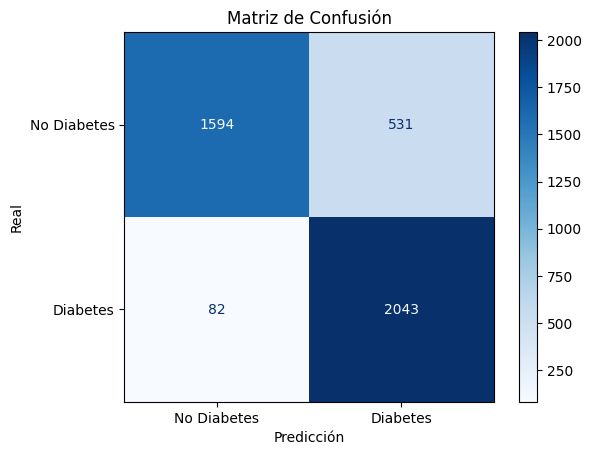

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predice la etiqueta para el conjunto de prueba
y_pred = dt.predict(x_test_balanced)

# Genera la matriz de confución
cm = confusion_matrix(y_test_balanced, y_pred) # y_test son los reales, y_pred son las prericciones

# Vizualisación de la matriz de confución
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Se puede observar que los:

*   **Verdaderos Positivos (True Positives - TP):** Son `2043` los casos en los que el modelo predijo correctamente que una persona tenía diabetes, y en realidad sí la tenía.
*   **Falsos Positivos (False Positives - FP):** Son `531` los casos en los que el modelo predijo que una persona tenía diabetes, pero en realidad no la tenía. Esto es un "error de Tipo I" y puede tener consecuencias, como preocupar innecesariamente a alguien o realizar pruebas adicionales.
*   **Verdaderos Negativos (True Negatives - TN):** Son `1594` los casos en los que el modelo predijo correctamente que una persona no tenía diabetes, y en realidad no la tenía.
*   **Falsos Negativos (False Negatives - FN):** Son `82` los casos en los que el modelo predijo que una persona no tenía diabetes, pero en realidad sí la tenía. Esto es un "error de Tipo II" y es potencialmente peligroso, ya que una persona con diabetes no sería diagnosticada a tiempo.

Usando estas probabilidades y las respuestas reales (si tenían diabetes o no) para dibujar una línea llamada **Curva ROC**. Esta curva muestra qué tan bueno es el modelo para encontrar a las personas con diabetes sin equivocarse demasiado al etiquetar tanto a personas sanas como enfermas.

Donde se calcula un número llamado **AUC** (Área bajo la Curva). Este número va de 0 a 1. Un AUC alto (cerca de 1) significa que el modelo es muy bueno para distinguir entre personas con y sin diabetes. Un AUC de 0.5 significa que el modelo es tan bueno como adivinar al azar.

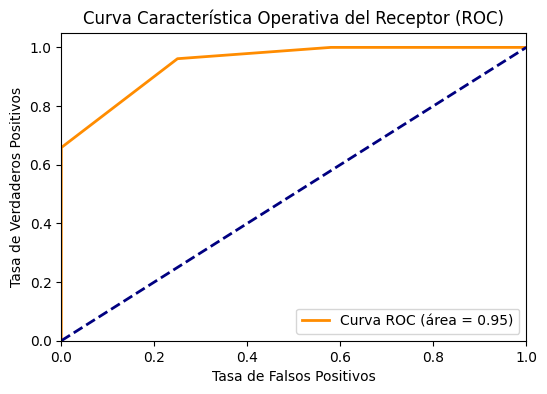

In [23]:
from sklearn.metrics import roc_curve, auc

# Calcula las probabilidades previstas para el conjunto de prueba.
y_pred_proba = dt.predict_proba(x_test_balanced)[:, 1]

# Calcular la tasa de falsos positivos, la tasa de verdaderos positivos y los umbrales.
fpr, tpr, thresholds = roc_curve(y_test_balanced, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC).
roc_auc = auc(fpr, tpr)

# Traza la curva ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

La gráfica muestra que el modelo funciona muy bien para distinguir entre casos positivos y negativos. La curva está por encima de la línea diagonal y el área de 0.93 indica un desempeño excelente, es decir, el modelo acierta la mayoría de las veces.

Se evaluara el modelo mediante un Reporte de Clasificación.

In [24]:
from sklearn.metrics import classification_report

y_pred = dt.predict(x_test_balanced)
print("Reporte de Clasificación:\n", classification_report(y_test_balanced,
                                                           y_pred, target_names=
                                                            ['No Diabetes', 'Diabetes']))

Reporte de Clasificación:
               precision    recall  f1-score   support

 No Diabetes       0.95      0.75      0.84      2125
    Diabetes       0.79      0.96      0.87      2125

    accuracy                           0.86      4250
   macro avg       0.87      0.86      0.85      4250
weighted avg       0.87      0.86      0.85      4250



Del Reporte de Clasificación se puede ver lo siguiente:

**precision:** De todas las personas que el modelo dijo que tienen diabetes, ¿cuántas realmente la tienen?  
El `79%` de estas personas.

**recall:** De todas las personas que realmente tienen diabetes, ¿cuántas fueron detectadas por el modelo?  
El modelo detectó correctamente el `96%` de las personas que sí tenían diabetes.

**f1-score:** Un F1-score alto indica que el modelo logra un buen balance entre no dar diagnósticos erróneos y no pasar por alto casos reales.  
Para este caso de diabetes, el modelo obtuvo un `0.87`, lo que refleja un equilibrio favorable entre precisión y recall.

**support:** Indica cuántas personas sin diabetes y cuántas con diabetes se usaron para evaluar el modelo.  
En este caso, hubo `2125` personas sin diabetes y `2125` personas con diabetes. Esto ayuda a interpretar mejor las métricas, ya que una métrica puede parecer alta pero corresponder a una clase con pocos casos.

---

**Promedios generales**

**accuracy:**  
Mide la proporción total de predicciones correctas. El modelo obtuvo una precisión global del `86%`.

**macro avg:**  
Promedio simple de las métricas de todas las clases sin importar cuántos casos tenga cada una.  
En este reporte: precisión `0.87`, recall `0.86` y F1 `0.85`.

**weighted avg:**  
Promedio ponderado según el número de ejemplos por clase.  
Tiene los mismos valores que el macro average: precisión `0.87`, recall `0.86` y F1 `0.85`.


Se extrae los Verdaderos Positivos (VP) y los Falsos Negativos (FN) de la matriz de confusión y calcular la sensibilidad (recall) para la clase 'Diabetes'.

In [25]:
import numpy as np

# La matriz cm está disponible en el estado del kernel:
# cm = np.array([[TN, FP], [FN, TP]])

# Extraer Verdaderos Positivos (TP) y Falsos Negativos (FN) para la clase 'Diabetes' (clase positiva)
TP = cm[1, 1]
FN = cm[1, 0]

# Calcular Sensibilidad (Recall) para la clase 'Diabetes'
sensitivity_diabetes_updated = TP / (TP + FN)

print(f"Verdaderos Positivos (TP): {TP}")
print(f"Falsos Negativos (FN): {FN}")
print(f"Sensibilidad Calculada (Recall) para 'Diabetes': {sensitivity_diabetes_updated:.2f}")

Verdaderos Positivos (TP): 2043
Falsos Negativos (FN): 82
Sensibilidad Calculada (Recall) para 'Diabetes': 0.96
